In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2b-data"

 # Overfitting and Regularization

In the realm of predictive modeling, the pursuit of creating a model that perfectly fits the training data can inadvertently lead to a phenomenon known as overfitting. Overfitting occurs when a model becomes excessively complex, capturing not only the genuine patterns within the data but also the noise and random fluctuations present in the training set. 

The hyper-adaptation to the training data renders the model less capable of generalizing to new, unseen data, as it effectively memorizes the training examples rather than discerning meaningful relationships. As a result, an overfitted model may exhibit impressive performance on the training data but performs poorly when faced with real-world scenarios. The delicate balance between capturing essential patterns and avoiding the trap of overfitting underscores the importance of techniques like regularization, which aim to ensure model generalization by restraining excessive complexity.

There are three Regularization techniques we will be dealing with, all of which use the idea of penalizing terms to tackle overfitting.

But before we go any further, let's have a look at the data.

**Data Dictionary**

* Product_ID:- Unique identifier for each electronic device. <br>
* Product_Weight:- Weight of the device  <br>
* Energy_Efficiency:- Energy efficiency rating (e.g., "Energy Efficient", "Standard"). <br>
* Visibility_Index:- The % of the total display area of all products in a store allocated to the particular product <br>
* Product_Category:- Category of the electronic device (e.g., "Laptops", "Smartphones"). <br>
* Product_Price:- Price of the device in dollars<br>
* Store_ID:- Unique identifier for the store.<br>
* Store_Established_Year:- Number of years since the store was established.<br>
* Store_Size:- Size classification of the store (e.g., "Small", "Medium").<br>
* Location_Type:- The type of city in which the store is located<br>
* Store_Type:- Type of store (e.g., "Electronics Store Type1").<br>
* Sales_Performance:- Sales of the electronic device in the particular store. This is the outcome variable to be predicted.


## Visualizing the data

Let's visualize this all in the form of a Data Frame

In [2]:
data <- read.csv("/kaggle/input/2b-data/2b-data.csv")
head(data)

,Product_ID,Product_Weight,Energy_Efficiency,Visibility_Index,Product_Category,Product_Price,Store_ID,Store_Established_Year,Store_Size,Location_Type,Store_Type,Sales_Performance
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.300,Energy Efficient,0.01604730,Laptops,249.8092,OUT049,14,Medium,Tier 1,Electronics Store Type1,3735.1380
2,DRC01,5.920,Standard,0.01927822,Smartphones,48.2692,OUT018,4,Medium,Tier 3,Electronics Store Type2,443.4228
3,FDN15,17.500,Energy Efficient,0.01676007,Tablets,141.6180,OUT049,14,Medium,Tier 1,Electronics Store Type1,2097.2700
4,FDX07,19.200,Standard,0.06613203,Monitors,182.0950,OUT010,15,Small,Tier 3,Retail Electronics Store,732.3800
5,NCD19,8.930,Energy Efficient,0.06613203,Refrigerators,53.8614,OUT013,26,High,Tier 3,Electronics Store Type1,994.7052
6,FDP36,10.395,Standard,0.06613203,Microwaves,51.4008,OUT018,4,Medium,Tier 3,Electronics Store Type2,556.6088


## Ridge Regression
Ridge regression is a linear regression technique that incorporates L2 regularization to address issues in predictive modeling (overfitting, multi-colinearity etc).
Linear regression, aims to minimize the sum of squared residuals whereas Ridge regression introduces a penalty term proportional to the square of the magnitude of the coefficients. This penalty, controlled by a hyperparameter (often denoted as lambda), discourages large coefficient values, effectively constraining the model’s complexity, enhancing its stability and generalization performance.


**1)** Perform Ridge Regression on the training data and compare the predictions with the test data to check for the fit of the model. (Hint: Use the glmnet library) (2 marks) <br>
You can split the dataset into 70% train and 30% test.  

In [3]:
if (!requireNamespace("glmnet", quietly = TRUE)) {
    install.packages("glmnet")
}
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [4]:
train<-data[c(-1,-7)]
Y<-train[c(10)]
X <- model.matrix(Sales_Performance~., train)[,-1]
set.seed(567)

part <- sample(2, nrow(X), replace = TRUE, prob = c(0.7, 0.3))
X_train<- X[part == 1,]
X_cv<- X[part == 2,]
Y_train<- Y[part == 1,]
Y_cv<- Y[part == 2,]

ridge_reg <- glmnet(X_train, Y_train, alpha = 0)

**2)** Is it possible for you to somehow conduct hyperparameter tuning and find the best lambda value for the Ridge Regression model? (Hint: use the cv.glmnet function)   (1 mark)

In [5]:
ridge_reg1 <- cv.glmnet(X_train, Y_train, alpha = 0)

bestlam <- ridge_reg1$lambda.min
print(bestlam)
ridge.pred <- predict(ridge_reg, s = bestlam, newx = X_cv)

[1] 98.68757


**3)** With the optimal lambda, build the model again and print the coefficients of the various dependent variables. What can you comment about the relationship between lambda and the strength of regularization?        (2 marks)


In [6]:
ridge_final <- glmnet(X_train, Y_train, alpha = 0, lambda = bestlam)
ridge_coef_final <- coef(ridge_final)
print("Coefficients :")
print(ridge_coef_final)

[1] "Coefficients :"
28 x 1 sparse Matrix of class "dgCMatrix"
                                                    s0
(Intercept)                                 189.995530
Product_Weight                               -2.020927
Energy_EfficiencyStandard                    39.549175
Visibility_Index                           -619.146188
Product_CategoryCameras                      34.695765
Product_CategoryHeadphones                   80.149754
Product_CategoryHome Theater Systems        118.185029
Product_CategoryKeyboards                    45.863053
Product_CategoryLaptops                      50.553944
Product_CategoryMicrowaves                   52.866816
Product_CategoryMiscellaneous Electronics   -56.398372
Product_CategoryMonitors                     47.216039
Product_CategoryMouse                        89.121489
Product_CategoryPrinters                     82.709920
Product_CategoryRefrigerators                -3.091872
Product_CategorySmartphones                 -23.841540
Pr

**Inference:**

The coefficients indicate the relationship between each predictor and the target variable. A higher absolute value of a coefficient signifies a stronger influence on the prediction. Regularization helps shrink the coefficients, reducing their influence and thus stabilizing the model.


**Relationship Between Lambda and Strength of Regularization :**


As lambda increases, the coefficients shrink towards zero, indicating stronger regularization. Higher lambda values reduce model complexity, which can help prevent overfitting but may also lead to underfitting if set too high.

## Lasso Regression

Lasso regression is similar to Ridge Regression except that instead of L2 regularization, it employs L1 regularization to address the very same issues that Ridge Regression addresses. 

There are however, a couple of differences between the two. The first and most obvious being that since Lasso Regression implements L1 regularization, the penalty term in this case is proportional to the absolute value of the coefficient. 

Another point to note is that unlike its Ridge counterpart, Lasso Regression can push some coefficients to exactly 0. This effectively drops the feature from the predictive model (Similar to how we drop values through visual analysis). Lasso Regression can thus be used effectively for Feature Selection as well.

**1)** Write code to build a Lasso Regression model similar to how you built the Ridge Regression model. This time incorporate hyperparameter tuning right away. So first print the optimal lambda value.                  (2 marks)

In [7]:
train <- data[c(-1,-7)]
Y <- train[c(10)]
X <- model.matrix(Sales_Performance ~ ., train)[,-1]

set.seed(567)
part <- sample(2, nrow(X), replace = TRUE, prob = c(0.7, 0.3))
X_train <- X[part == 1,]
X_cv <- X[part == 2,]
Y_train <- Y[part == 1,]
Y_cv <- Y[part == 2,]

lasso_reg1 <- cv.glmnet(X_train, Y_train, alpha = 1)
bestlam_lasso <- lasso_reg1$lambda.min
print(paste("Optimal Lambda:", bestlam_lasso))

lasso_final <- glmnet(X_train, Y_train, alpha = 1, lambda = bestlam_lasso)

[1] "Optimal Lambda: 18.0671110975134"


**2)** Display the coefficients of all the variables. Do you notice some variables being dropped out? Which ones are they?   (1 mark)

In [8]:
lasso_coef_final <- coef(lasso_final)

lasso_coef_final[lasso_coef_final == 0] <- 0

print("Coefficients:")
print(as.matrix(lasso_coef_final))

lasso_pred <- predict(lasso_final, s = bestlam_lasso, newx = X_cv)

[1] "Coefficients:"
                                                    s0
(Intercept)                                 120.697202
Product_Weight                                0.000000
Energy_EfficiencyStandard                    19.962671
Visibility_Index                            -82.400956
Product_CategoryCameras                       0.000000
Product_CategoryHeadphones                    0.000000
Product_CategoryHome Theater Systems          0.000000
Product_CategoryKeyboards                     0.000000
Product_CategoryLaptops                       0.000000
Product_CategoryMicrowaves                    0.000000
Product_CategoryMiscellaneous Electronics     0.000000
Product_CategoryMonitors                      0.000000
Product_CategoryMouse                         0.000000
Product_CategoryPrinters                      0.000000
Product_CategoryRefrigerators                 0.000000
Product_CategorySmartphones                   0.000000
Product_CategorySpeakers                     

**Dropped Variables**


1. Product_Weight
1. Product_CategoryCameras
1. Product_CategoryHeadphones
1. Product_CategoryHome Theater Systems
1. Product_CategoryKeyboards
1. Product_CategoryLaptops
1. Product_CategoryMicrowaves
1. Product_CategoryMiscellaneous Electronics
1. Product_CategoryMonitors
1. Product_CategoryMouse
1. Product_CategoryPrinters
1. Product_CategoryRefrigerators
1. Product_CategorySmartphones
1. Product_CategorySpeakers
1. Product_CategoryTablets
1. Product_CategoryWashing Machines
1. Store_Established_Year
1. Store_SizeMedium
1. Store_SizeSmall
1. Location_TypeTier 3


**Lasso regression has excluded these variables from the model, because they are not significantly contributing to predict the Sales_Performance.**

## Elastic Net Regression

Elastic Net regression, an advanced form of linear regression, combines the benefits of L1 (Lasso) and L2 (Ridge) regularization methods. By integrating both penalty terms, Elastic Net overcomes the limitations of each, offering resilience against multicollinearity, aiding feature selection, and preventing overfitting. 

This approach makes Elastic Net a very versatile approach for achieving accurate and efficient models by finding a middle ground between dropping parameters and retaining important predictors. 

**1)** Build your Elastic Net Regression model incorporating all the steps we previously followed for ridge and lasso regression. (Play around with the alpha value and find out how it affects the model)            (2 marks)


[1] "Alpha: 0 - Optimal Lambda: 98.6875693373196"
[1] "Alpha: 0.1 - Optimal Lambda: 30.8469299644867"
[1] "Alpha: 0.2 - Optimal Lambda: 42.9167075009535"
[1] "Alpha: 0.3 - Optimal Lambda: 37.8222410681274"
[1] "Alpha: 0.4 - Optimal Lambda: 31.132397160338"
[1] "Alpha: 0.5 - Optimal Lambda: 32.9241574853102"
[1] "Alpha: 0.6 - Optimal Lambda: 24.9993883975797"
[1] "Alpha: 0.7 - Optimal Lambda: 28.3266173222098"
[1] "Alpha: 0.8 - Optimal Lambda: 20.5775984283188"
[1] "Alpha: 0.9 - Optimal Lambda: 16.6662589317198"
[1] "Alpha: 1 - Optimal Lambda: 18.0671110975134"
[1] "Best Alpha: 0.3"
[1] "Best Lambda: 37.8222410681274"
[1] "Lowest MSE: 1273532.43496793"


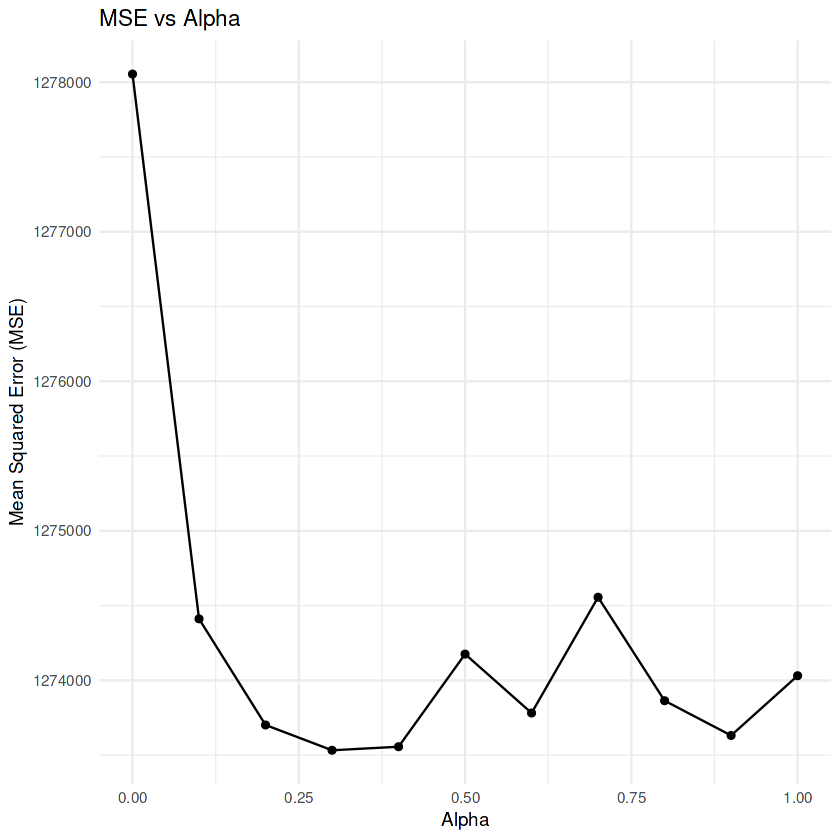

In [9]:
library(ggplot2)

train <- data[c(-1, -7)]
Y <- train[c(10)]
X <- model.matrix(Sales_Performance ~ ., train)[, -1]

set.seed(567)
part <- sample(2, nrow(X), replace = TRUE, prob = c(0.7, 0.3))
X_train <- X[part == 1, ]
X_cv <- X[part == 2, ]
Y_train <- as.matrix(Y[part == 1, ])
Y_cv <- as.matrix(Y[part == 2, ])

alpha_values <- seq(0, 1, by = 0.1)
results <- data.frame(alpha = numeric(), best_lambda = numeric(), mse_cv = numeric())

for (alpha_value in alpha_values) {
  elastic_net_reg <- cv.glmnet(X_train, Y_train, alpha = alpha_value)
  
  bestlam_elastic_net <- elastic_net_reg$lambda.min
  print(paste("Alpha:", alpha_value, "- Optimal Lambda:", bestlam_elastic_net))
  
  elastic_net_final <- glmnet(X_train, Y_train, alpha = alpha_value, lambda = bestlam_elastic_net)
  predictions_cv <- predict(elastic_net_final, newx = X_cv)
  
  mse_cv <- mean((Y_cv - predictions_cv)^2)
  results <- rbind(results, data.frame(alpha = alpha_value, best_lambda = bestlam_elastic_net, mse_cv = mse_cv))
}

ggplot(results, aes(x = alpha, y = mse_cv)) +
  geom_line() +
  geom_point() +
  labs(title = "MSE vs Alpha", x = "Alpha", y = "Mean Squared Error (MSE)") +
  theme_minimal()

best_result <- results[which.min(results$mse_cv), ]
print(paste("Best Alpha:", best_result$alpha))
print(paste("Best Lambda:", best_result$best_lambda))
print(paste("Lowest MSE:", best_result$mse_cv))

Identify and list the variables that have been dropped in the Elastic Net model. How does this compare to the variables dropped in the Lasso model? <br>
What does that tell you about the number of hyperparameters in Elastic Net Regression compared to the other two models?

In [10]:
best_alpha <- best_result$alpha
best_lambda <- best_result$best_lambda

elastic_net_final <- glmnet(X_train, Y_train, alpha = best_alpha, lambda = best_lambda)

elastic_net_coefficients <- as.matrix(coef(elastic_net_final))

dropped_coefficients <- rownames(elastic_net_coefficients)[elastic_net_coefficients[, 1] == 0]

print("Elastic Net Coefficients:")
print(elastic_net_coefficients)

[1] "Elastic Net Coefficients:"
                                                    s0
(Intercept)                                 130.403459
Product_Weight                                0.000000
Energy_EfficiencyStandard                    32.276063
Visibility_Index                           -256.167127
Product_CategoryCameras                       0.000000
Product_CategoryHeadphones                   14.743992
Product_CategoryHome Theater Systems          0.000000
Product_CategoryKeyboards                     0.000000
Product_CategoryLaptops                       0.000000
Product_CategoryMicrowaves                    0.000000
Product_CategoryMiscellaneous Electronics   -13.462606
Product_CategoryMonitors                      0.000000
Product_CategoryMouse                         0.000000
Product_CategoryPrinters                      0.000000
Product_CategoryRefrigerators                -6.992067
Product_CategorySmartphones                  -1.638841
Product_CategorySpeakers         

In [11]:
print("Dropped Coefficients:")
print(dropped_coefficients)

[1] "Dropped Coefficients:"
 [1] "Product_Weight"                      
 [2] "Product_CategoryCameras"             
 [3] "Product_CategoryHome Theater Systems"
 [4] "Product_CategoryKeyboards"           
 [5] "Product_CategoryLaptops"             
 [6] "Product_CategoryMicrowaves"          
 [7] "Product_CategoryMonitors"            
 [8] "Product_CategoryMouse"               
 [9] "Product_CategoryPrinters"            
[10] "Product_CategorySpeakers"            
[11] "Product_CategoryTablets"             
[12] "Store_Established_Year"              
[13] "Store_SizeSmall"                     
[14] "Location_TypeTier 3"                 


The variables that were dropped in the Elastic Net model are:

1. Product_Weight
1. Product_CategoryCameras
1. Product_CategoryHome Theater Systems
1. Product_CategoryKeyboards
1. Product_CategoryLaptops
1. Product_CategoryMicrowaves
1. Product_CategoryMonitors
1. Product_CategoryMouse
1. Product_CategoryPrinters
1. Product_CategorySpeakers
1. Product_CategoryTablets
1. Store_Established_Year
1. Store_SizeSmall
1. Location_TypeTier 3



**Comparison with Lasso Model:**

The dropped variables in the Elastic Net model overlap significantly with those in the Lasso model. However, Elastic Net can retain variables that Lasso may drop due to its combination of penalties, allowing for more flexibility.

**Conclusion on Hyperparameters :**

Elastic Net has two hyperparameters (alpha and lambda), allowing for more nuanced control over the balance between L1 and L2 regularization compared to Lasso (which only has lambda) and Ridge (which also only has lambda). This flexibility can lead to better performance in cases with correlated features or when dealing with high-dimensional datasets.